In [43]:
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error


X_train=[[6],[8],[10],[14],[18]]
y_train=[[7],[9],[13],[17.5],[18]]
X_test=[[8],[9],[11],[16],[12]]
y_test=[[11],[8.5],[15],[18],[11]]

model = LinearRegression()
lm=model.fit(X_train,y_train)
y_pred=lm.predict(X_test)
mean_squared_error(y_test,y_pred)
print(y_pred)
print('R-squared:%.4f'%model.score(X_test,y_test))
print('MSE:%.4f'%mean_squared_error(y_test,y_pred))
print('Coefficients:',model.coef_)
print('Intercept:',model.intercept_)




[[ 9.77586207]
 [10.75215517]
 [12.70474138]
 [17.5862069 ]
 [13.68103448]]
R-squared:0.6620
MSE:3.8396
Coefficients: [[0.9762931]]
Intercept: [1.96551724]


In [44]:
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

matplotlib.style.use('ggplot')
sns.set(style="white",color_codes=True)

In [45]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import KFold
import numpy as np
import pylab as pl



In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
boston =load_boston()

In [47]:
type(boston)

sklearn.utils.Bunch

In [48]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [49]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

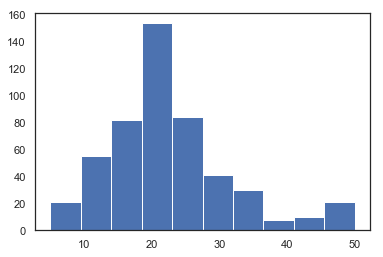

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(boston.target)

In [51]:
x =boston.data
y=boston.target

In [52]:
from sklearn import metrics

#comparisons across methods
a = 0.3

for name,method in [
        ('Linear regression', LinearRegression()),
        ('Lasso', Lasso(fit_intercept=True, alpha=a)),
        ('Ridge', Ridge(fit_intercept=True, alpha=a)),
        ('Elastic-net', ElasticNet(fit_intercept=True,alpha=a))
        ]:
    
     
    k_fold = KFold(10)
    rsq=[]
    mse=[]
  
    for k, (train, test) in enumerate(k_fold.split(x, y)):
        method.fit(x[train],y[train])
        py = method.predict(x[test])
        rsq.append(metrics.r2_score(y[test],py,multioutput='raw_values'))
        mse.append(metrics.mean_squared_error(y[test],py))
    print(rsq)
    print(mse)
    cvrsq=np.average(rsq)
    cvmse=np.average(mse)
        
        
    print('Method: %s' %name)
    print('RScore 10fold avg  : %.4f' %cvrsq)
    print('MSE on 10-fold CV: %.4f' %cvmse)
    print('Coefficients:n',method.coef_)
    print('Intercept:n',method.intercept_)
    print ("\n")

[array([0.73376082]), array([0.4730725]), array([-1.00631454]), array([0.64113984]), array([0.54766046]), array([0.73640292]), array([0.37828386]), array([-0.12922703]), array([-0.76843243]), array([0.4189435])]
[9.286946705879672, 14.151283161508543, 14.073606154569493, 35.20692432585353, 31.885116664485235, 19.835877961829688, 9.94726918189768, 168.3753795422647, 33.32974506753778, 10.960410679423061]
Method: Linear regression
RScore 10fold avg  : 0.2025
MSE on 10-fold CV: 34.7053
Coefficients:n [-1.05618627e-01  4.91381113e-02  3.21540897e-02  2.51293737e+00
 -1.76280019e+01  3.81765978e+00  1.05792271e-02 -1.43608998e+00
  3.61498721e-01 -1.54712068e-02 -9.12347239e-01  9.85932090e-03
 -5.55092176e-01]
Intercept:n 35.56663916068057


[array([0.72268061]), array([0.52494631]), array([-0.24735376]), array([0.55130048]), array([0.55369051]), array([0.70356046]), array([0.29382634]), array([-0.00020556]), array([-0.6474623]), array([0.30241306])]
[9.673446233559911, 12.758148664196002,

In [53]:
mod=LinearRegression()
model=mod.fit(x,y)

In [54]:
from sklearn.externals import joblib 
joblib.dump(model, 'Boston_regressor.pkl')

['Boston_regressor.pkl']